In [29]:
import xml.etree.ElementTree as ET


def values(elements, node, tag):
    return [element[node].get(tag) for element in elements]

In [30]:
class Vector3(object):
    def __init__(self, x: float, y: float, z: float):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)

    def __repr__(self):  # for debugging
        return f"Vector3({self.x}, {self.y}, {self.z})"

    def __str__(self):  # for printing
        return f"{self.x}, {self.y}, {self.z}"

    def __eq__(self, other):
        """Overload equality operator."""
        if not isinstance(other, Vector3):
            return False
        return (self.x == other.x) and (self.y == other.y) and (self.z == other.z)

    def __add__(self, other):
        """Overload addition operator."""
        if isinstance(other, Vector3):
            x = self.x + other.x
            y = self.y + other.y
            z = self.z + other.z
        else:
            x = self.x + other
            y = self.y + other
            z = self.z + other
        return Vector3(x, y, z)

    def __sub__(self, other):
        """Overload subtraction operator."""
        if isinstance(other, Vector3):
            x = self.x - other.x
            y = self.y - other.y
            z = self.z - other.z
        else:
            x = self.x - other
            y = self.y - other
            z = self.z - other
        return Vector3(x, y, z)

    def __mul__(self, other):
        """Overload multiplication operator."""
        if isinstance(other, Vector3):
            x = self.x * other.x
            y = self.y * other.y
            z = self.z * other.z
        else:
            x = self.x * other
            y = self.y * other
            z = self.z * other
        return Vector3(x, y, z)

    def __truediv__(self, other):
        """Overload division operator."""
        if isinstance(other, Vector3):
            x = self.x / other.x
            y = self.y / other.y
            z = self.z / other.z
        else:
            x = self.x / other
            y = self.y / other
            z = self.z / other
        return Vector3(x, y, z)

    def magnitude(self):
        """Compute magnitude (length)."""
        x = self.x**2
        y = self.y**2
        z = self.z**2
        return sqrt(x + y + z)
    

class Quaternion(object):
    def __init__(self, w: float, x: float, y: float, z: float):
        self.w = float(w)
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)

    def __repr__(self):  # for debugging
        return f"Quaternion({self.w}, {self.x}, {self.y}, {self.z})"

    def __str__(self):  # for printing
        return f"{self.w}, {self.x}, {self.y}, {self.z}"

    def __eq__(self, other):
        """Overload equality operator."""
        if not isinstance(other, Quaternion):
            return False
        return (self.w == other.w) and (self.x == other.x) and (self.y == other.y) and (self.z == other.z)

    def __add__(self, other):
        """Overload addition operator."""
        if isinstance(other, Quaternion):
            w = self.w + other.w
            x = self.x + other.x
            y = self.y + other.y
            z = self.z + other.z
        else:
            w = self.w + other
            x = self.x + other
            y = self.y + other
            z = self.z + other
        return Quaternion(w, x, y, z)

    def __sub__(self, other):
        """Overload subtraction operator."""
        if isinstance(other, Quaternion):
            w = self.w - other.w
            x = self.x - other.x
            y = self.y - other.y
            z = self.z - other.z
        else:
            w = self.w - other
            x = self.x - other
            y = self.y - other
            z = self.z - other
        return Quaternion(w, x, y, z)

    def __mul__(self, other):
        """Overload multiplication operator."""
        if isinstance(other, Quaternion):
            w = self.w * other.w
            x = self.x * other.x
            y = self.y * other.y
            z = self.z * other.z
        else:
            w = self.w * other
            x = self.x * other
            y = self.y * other
            z = self.z * other
        return Quaternion(w, x, y, z)

    def __truediv__(self, other):
        """Overload division operator."""
        if isinstance(other, Quaternion):
            w = self.w / other.w
            x = self.x / other.x
            y = self.y / other.y
            z = self.z / other.z
        else:
            w = self.w / other
            x = self.x / other
            y = self.y / other
            z = self.z / other
        return Quaternion(w, x, y, z)

    def magnitude(self):
        """Compute magnitude (length)."""
        w = self.w**2
        x = self.x**2
        y = self.y**2
        z = self.z**2
        return sqrt(w + x + y + z)

# 1. Dataset construction

In [31]:
import csv

objects = ["Argos", "Orion", "Teuthus", "Vermis"]
datasets = {}

## 1.1. Weapons

In [32]:
class Weapon(object):
    def __init__(self, scale: Vector3, position: Vector3, orientation: Quaternion,
                       hull_index_parent: int, local_direction: Vector3):
        self.scale              = scale
        self.position           = position
        self.orientation        = orientation
        self.hull_index_parent  = int(hull_index_parent)
        self.local_direction    = local_direction

In [33]:
nodes = {"ObjectData": 0, "ComponentData": 3}

for o in objects:
    xml = ET.parse(f"{o}.xml").getroot()
    
    print(f"###### Working with {o}.xml #######")
    
    ### Weapons ###
    weapons = xml.findall("WEAPONRYWEAPONSAI/Weapon")
    print(f"\nNo. of 'WEAPONRYWEAPONSAI/Weapon': %d\n" % len(weapons))
    
    if len(weapons) > 0:
        scales_x = values(weapons, nodes["ObjectData"], "ScaleX")
        scales_y = values(weapons, nodes["ObjectData"], "ScaleY")
        scales_z = values(weapons, nodes["ObjectData"], "ScaleZ")
        scales = [Vector3(scales_x[i], scales_y[i], scales_z[i]) for i in range(len(weapons))]
        print(f"Scales: {scales}\n")

        positions_x = values(weapons, nodes["ObjectData"], "PositionX")
        positions_y = values(weapons, nodes["ObjectData"], "PositionY")
        positions_z = values(weapons, nodes["ObjectData"], "PositionZ")
        positions = [Vector3(positions_x[i], positions_y[i], positions_z[i]) for i in range(len(weapons))]
        print(f"Positions: {positions}\n")

        orientations_w = values(weapons, nodes["ObjectData"], "OrientationW")
        orientations_x = values(weapons, nodes["ObjectData"], "OrientationX")
        orientations_y = values(weapons, nodes["ObjectData"], "OrientationY")
        orientations_z = values(weapons, nodes["ObjectData"], "OrientationZ")
        orientations = [Quaternion(orientations_w[i], orientations_x[i], orientations_y[i], orientations_z[i]) for i in range(len(weapons))]
        print(f"Orientations: {orientations}\n")

        hull_index_parents = list(map(int, values(weapons, nodes["ComponentData"], "HullIndexParent")))
        print(f"HullIndexParents: {hull_index_parents}\n")

        local_directions_x = values(weapons, nodes["ComponentData"], "LocalDirectionX")
        local_directions_y = values(weapons, nodes["ComponentData"], "LocalDirectionY")
        local_directions_z = values(weapons, nodes["ComponentData"], "LocalDirectionZ")
        local_directions = [Vector3(local_directions_x[i], local_directions_y[i], local_directions_z[i]) for i in range(len(weapons))]
        print(f"LocalDirections: {local_directions}\n")

        weapons_ = [Weapon(scales[i], positions[i], orientations[i],
                           hull_index_parents[i], local_directions[i])
                    for i in range(len(weapons))]

        dataset = []
        for i in range(len(weapons)):
            dataset.append({"Name": f"{o}-baseline",
                            "HullIndexParent": weapons_[i].hull_index_parent,
                            "ScaleX": weapons_[i].scale.x,
                            "ScaleY": weapons_[i].scale.y,
                            "ScaleZ": weapons_[i].scale.z,
                            "PositionX": weapons_[i].position.x,
                            "PositionY": weapons_[i].position.y,
                            "PositionZ": weapons_[i].position.z,
                            "OrientationW": weapons_[i].orientation.w,
                            "OrientationX": weapons_[i].orientation.x,
                            "OrientationY": weapons_[i].orientation.y,
                            "OrientationZ": weapons_[i].orientation.z,
                            "LocalDirectionX": weapons_[i].local_direction.x,
                            "LocalDirectionY": weapons_[i].local_direction.y,
                            "LocalDirectionZ": weapons_[i].local_direction.z,
                            "Fitness": 1})

        datasets[f"{o}_dataset_weapons"] = dataset

        with open(f"{o}_dataset_weapons.csv", mode='w') as file:
            fieldnames = ["Name",
                          "HullIndexParent",
                          "ScaleX",
                          "ScaleY",
                          "ScaleZ",
                          "PositionX",
                          "PositionY",
                          "PositionZ",
                          "OrientationW",
                          "OrientationX",
                          "OrientationY",
                          "OrientationZ",
                          "LocalDirectionX",
                          "LocalDirectionY",
                          "LocalDirectionZ",
                          "Fitness"]

            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()

            for row in dataset:
                # print(f"{row}\n")
                writer.writerow(row)

###### Working with Argos.xml #######

No. of 'WEAPONRYWEAPONSAI/Weapon': 19

Scales: [Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0), Vector3(1.0, 1.0, 1.0)]

Positions: [Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0, 0.0, 0.0), Vector3(0.0,

## 1.2. Links

In [34]:
class Link(object):
    def __init__(self, link_type: int, hull_index_first: int, hull_index_second: int,
                       destructible: int, destruction_delay: float,
                       effect_multiplier_kill: float, effect_multiplier_destroy: float,
                       effects_mask_kill: str, effects_mask_destroy: str):
        self.link_type = int(link_type)
        
        self.hull_index_first = int(hull_index_first)
        self.hull_index_second = int(hull_index_second)
        self.destructible = int(destructible)
        self.destruction_delay = float(destruction_delay)
        self.effect_multiplier_kill = float(effect_multiplier_kill)
        self.effect_multiplier_destroy = float(effect_multiplier_destroy)
        self.effects_mask_kill = effects_mask_kill
        self.effects_mask_destroy = effects_mask_destroy

In [35]:
nodes = {"LinkData": 0}

for o in objects:
    xml = ET.parse(f"{o}.xml").getroot()
    
    print(f"###### Working with {o}.xml #######")
    
    ### Links ###
    links = xml.findall("HULL/LINKS/Link")
    print(f"\nNo. of 'HULL/LINKS/Link': %d\n" % len(links))
    
    if len(links) > 0:
        link_types = list(map(int, [link.get("LinkType") for link in links]))
        print(f"LinkTypes: {link_types}\n")
        
        hulls_index_first = list(map(int, values(links, nodes["LinkData"], "HullIndexFirst")))
        print(f"HullsIndexFirst: {hulls_index_first}\n")
        
        hulls_index_second = list(map(int, values(links, nodes["LinkData"], "HullIndexSecond")))
        print(f"HullsIndexSecond: {hulls_index_second}\n")        
        
        destructibles = list(map(int, values(links, nodes["LinkData"], "Destructible")))
        print(f"Destructibles: {destructibles}\n")        
        
        destruction_delays = list(map(float, values(links, nodes["LinkData"], "DestructionDelay")))
        print(f"DestructionDelays: {destruction_delays}\n")        
        
        effect_multipliers_kill = list(map(float, values(links, nodes["LinkData"], "EffectMultiplierKill")))
        print(f"EffectMultipliersKill: {effect_multipliers_kill}\n")
        
        effect_multipliers_destroy = list(map(float, values(links, nodes["LinkData"], "EffectMultiplierDestroy")))
        print(f"EffectMultipliersDestroy: {effect_multipliers_destroy}\n")        
        
        effects_masks_kill = values(links, nodes["LinkData"], "EffectsMaskKill")
        print(f"EffectsMasksKill: {effects_masks_kill}\n")        
        
        effects_masks_destroy = values(links, nodes["LinkData"], "EffectsMaskDestroy")
        print(f"EffectsMasksDestroy: {effects_masks_destroy}\n")
    
        links_ = [Link(link_types[i], hulls_index_first[i], hulls_index_second[i],
                       destructibles[i], destruction_delays[i],
                       effect_multipliers_kill[i], effect_multipliers_destroy[i],
                       effects_masks_kill[i], effects_masks_destroy[i])
                  for i in range(len(links))]

        dataset = []
        for i in range(len(links)):
            dataset.append({"Name": f"{o}-baseline",
                            "LinkType": links_[i].link_type,
                            "HullIndexFirst": links_[i].hull_index_first,
                            "HullIndexSecond": links_[i].hull_index_second,
                            "Destructible": links_[i].destructible,
                            "DestructionDelay": links_[i].destruction_delay,
                            "EffectMultiplierKill": links_[i].effect_multiplier_kill,
                            "EffectMultiplierDestroy": links_[i].effect_multiplier_destroy,
                            "EffectsMaskKill": links_[i].effects_mask_kill,
                            "EffectsMaskDestroy": links_[i].effects_mask_destroy,
                            "Fitness": 1})

        datasets[f"{o}_dataset_links"] = dataset

        with open(f"{o}_dataset_links.csv", mode='w') as file:
            fieldnames = ["Name",
                          "LinkType",
                          "HullIndexFirst",
                          "HullIndexSecond",
                          "Destructible",
                          "DestructionDelay",
                          "EffectMultiplierKill",
                          "EffectMultiplierDestroy",
                          "EffectsMaskKill",
                          "EffectsMaskDestroy",
                          "Fitness"]

            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()

            for row in dataset:
                # print(f"{row}\n")
                writer.writerow(row)

###### Working with Argos.xml #######

No. of 'HULL/LINKS/Link': 35

LinkTypes: [0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3]

HullsIndexFirst: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 0, 21, 21, 21, 21, 24, 25, 26, 26, 27, 27, 24, 25, 22, 23]

HullsIndexSecond: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 29, 31, 32, 33, 34, 35]

Destructibles: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

DestructionDelays: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

EffectMultipliersKill: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

E

# 2. Mutant creation for training

In [36]:
import random
import numpy as np

In [37]:
''' Subjects a given value to a mutation process.

The result of the mutation can be: (0) value incremented by a percent,
(1) value decremented by a percent, or (2) default value.

:param value: input value
:type value: float
:param percentage: mutation's percent
:type percentage: int
:returns: mutated value
:rtype: float
'''
def mutate_value(value: float, percentage: int) -> float:
    mutation = random.randrange(0, 2 + 1, 1)  # value range: (0, 1, 2)

    if mutation == 0:  # incremental mutation
        return float(value + value * (percentage / 100))
    elif mutation == 1:  # decremental mutation
        return float(value - value * (percentage / 100))
    else:
        return value


''' Subjects a given set of properties belonging to an specific dataset to a mutation process.

Usage:
  1. mutate_props(dataset_, props=props, percentage=[10, 15])
  2. mutate_props(dataset_, props=props, percentage=14)

:param dataset: input dataset
:type dataset: dictionary array
:param props: set of properties
:type props: str array
:param percentage: mutation's percent
:type percentage: int or list
:returns: mutated dataset
:rtype: dictionary array
'''
def mutate_props(dataset, props, percentage, index=0):
    if not isinstance(percentage, (int, list)):
        return

    dataset_mut = []

    isrange = True if isinstance(percentage, list) else False
    percentage_ = random.randrange(
        percentage[0], percentage[1] + 1, 1) if isinstance(percentage, list) else percentage

    for row in dataset:
        data = row.copy()

        if isrange:
            percentage_ = random.randrange(percentage[0], percentage[1] + 1, 1)

        for prop in props:
            data[prop] = mutate_value(float(row[prop]), percentage_)

        data["Name"] = data["Name"].replace("baseline", "mutated")
        data["Fitness"] = 1 - percentage_ / 100

        dataset_mut.append(data)

        index += 1

    return dataset_mut


''' Subjects a given model to a mutation process.

:param dataset: input dataset
:type dataset: dictionary array
:param props: set of properties
:type props: str array
:param percentage: mutation's percent
:type percentage: int or list
:param times: number of times the mutation is performed (default: 1)
:type times: int
:param filename: name of the csv file where to export the dataset (default: None)
:type filename: str
'''
def mutate_model(dataset, props, percentage, times=1, filename=None, fieldnames=["Name", "Fitness"]):
    dataset_all = np.array(dataset[:])

    for t in range(times):
        dataset_mut = np.array(mutate_props(
            dataset[:], props, percentage))
        dataset_all = np.concatenate((dataset_all, dataset_mut))

    if filename is not None:
        with open(filename + ".csv", mode='w') as file:
            writer = csv.DictWriter(file, fieldnames)
            writer.writeheader()

            for row in dataset_all:
                writer.writerow(row)


for key in datasets.keys():
    if "weapons" in key:
        fieldnames = ["Name", "HullIndexParent",
                      "ScaleX", "ScaleY", "ScaleZ", "PositionX", "PositionY", "PositionZ",
                      "OrientationW", "OrientationX", "OrientationY", "OrientationZ",
                      "LocalDirectionX", "LocalDirectionY", "LocalDirectionZ",
                      "Fitness"]
        mutate_model(datasets[key], props=["ScaleX", "ScaleY", "ScaleZ", "PositionX", "PositionY", "PositionZ",
                                           "OrientationW", "OrientationX", "OrientationY", "OrientationZ",
                                           "LocalDirectionX", "LocalDirectionY", "LocalDirectionZ"], percentage=[10, 15], times=49, filename=f"{key}_mut", fieldnames=fieldnames)
    elif "links" in key:
        fieldnames = ["Name", "LinkType", "HullIndexFirst", "HullIndexSecond", "Destructible", "DestructionDelay",
                      "EffectMultiplierKill", "EffectMultiplierDestroy", "EffectsMaskKill", "EffectsMaskDestroy",
                      "Fitness"]
        mutate_model(datasets[key], props=["DestructionDelay", "EffectMultiplierKill", "EffectMultiplierDestroy"], percentage=[10, 15], times=49, filename=f"{key}_mut", fieldnames=fieldnames)

# 3. Model classification (10-fold Cross-validation)

In [38]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Argos_dataset_weapons_mut.csv ###

[[1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]

Classes: ['Argos-baseline' 'Argos-baseline' 'Argos-baseline' 'Argos-baseline'
 'Argos-baseline' 'Argos-baseline' 'Argos-baseline' 'Argos-baseline'
 'Argos-baseline' 'Argos-baseline' 'Argos-baseline' 'Argos-baseline'
 'Argos-baseline' 'Argos-baseline' 'Argos-baseline' 'Argos-baseline'
 'Argos-baseline' 'Argos-baseline' 'Argos-baseline' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argos-mutated' 'Argos-mutated' 'Argos-mutated' 'Argos-mutated'
 'Argo

FileNotFoundError: [Errno 2] No such file or directory: 'plots/Argos_dataset_weapons_model_accuracies.pdf'

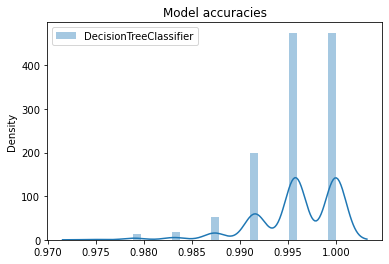

In [39]:
for key in datasets.keys():
    if "weapons" in key:
        fieldnames = ["ScaleX", "ScaleY", "ScaleZ", "PositionX", "PositionY", "PositionZ",
                      "OrientationW", "OrientationX", "OrientationY", "OrientationZ",
                      "LocalDirectionX", "LocalDirectionY", "LocalDirectionZ"]
    elif "links" in key:
        # TODO: Define props to be mutated
        fieldnames = ["DestructionDelay", "EffectMultiplierKill", "EffectMultiplierDestroy"]
    
    print(f"### {key}_mut.csv ###\n")
    model_data = pd.read_csv(f"{key}_mut.csv")

    all_inputs = model_data[fieldnames].values
    all_classes = model_data["Name"].values
    
    print(all_inputs[:5], end='\n\n')
    print(f"Classes: {all_classes}", end='\n\n')
    
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.80, random_state=456)

    print(f"Training set: {training_inputs.shape}")
    print(f"Testing set: {testing_inputs.shape}", end='\n\n')
    
    ### DecisionTreeClassifier ###
    # Create the classifier.
    decision_tree_classifier = DecisionTreeClassifier()
    # Train the classifier on the training set.
    decision_tree_classifier.fit(training_inputs, training_classes)
    # Validate the classifier on the testing set using classification accuracy.
    print("DecisionTreeClassifier")
    print(decision_tree_classifier.score(testing_inputs, testing_classes))
    print(decision_tree_classifier.predict(testing_inputs[:1, :]), end='\n\n')

    ### Model accuracies ###
    plt.title("Model accuracies")
    # DecisionTreeClassifier
    model_accuracies = []
    for repetition in range(1000):
        (training_inputs,
         testing_inputs,
         training_classes,
         testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

        decision_tree_classifier = DecisionTreeClassifier()
        decision_tree_classifier.fit(training_inputs, training_classes)
        
        classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
        model_accuracies.append(classifier_accuracy)
    sb.distplot(model_accuracies, label="DecisionTreeClassifier")
    plt.legend()
    plt.savefig(f"plots/{key}_model_accuracies.pdf")
    plt.close("all")
    
    ### 10-fold Cross-validation ###
    # DecisionTreeClassifier(max_depth=4)
    decision_tree_classifier = DecisionTreeClassifier()

    # cross_val_score returns a list of the scores, which we can visualize
    # to get a reasonable estimate of the classifier's performance
    cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
    sb.distplot(cv_scores)
    plt.title(f"Average score: {np.mean(cv_scores)}")
    plt.savefig(f"plots/{key}_model_cv_scores.pdf")
    plt.close("all")